# Bias-Variance Trade-Off - Lab

## Introduction

In this lab, you'll practice your knowledge on the bias-variance trade-off!

## Objectives

You will be able to: 
- Look at an example where Polynomial regression leads to overfitting
- Understand how bias-variance trade-off relates to underfitting and overfitting

## Let's get started!

We'll try to predict some movie revenues based on certain factors, such as ratings and movie year.

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_excel('./movie_data_detailed_with_ols.xlsx')
df.head()

,budget,domgross,title,Response_Json,Year,imdbRating,Metascore,imdbVotes,Model
0,13000000,25682380,21 &amp; Over,0,2008,6.8,48,206513,4.912759e+07
1,45658735,13414714,Dredd 3D,0,2012,0.0,0,0,2.267265e+05
2,20000000,53107035,12 Years a Slave,0,2013,8.1,96,537525,1.626624e+08
3,61000000,75612460,2 Guns,0,2013,6.7,55,173726,7.723381e+07
4,40000000,95020213,42,0,2013,7.5,62,74170,4.151958e+07


In [2]:
# Only keep four predictors and transform the with MinMaxScaler

scale = MinMaxScaler()
df = df[[ "domgross", "budget", "imdbRating", "Metascore", "imdbVotes"]]
transformed = scale.fit_transform(df)
pd_df = pd.DataFrame(transformed, columns = df.columns)
pd_df.head()

,domgross,budget,imdbRating,Metascore,imdbVotes
0,0.055325,0.034169,0.839506,0.500000,0.384192
1,0.023779,0.182956,0.000000,0.000000,0.000000
2,0.125847,0.066059,1.000000,1.000000,1.000000
3,0.183719,0.252847,0.827160,0.572917,0.323196
4,0.233625,0.157175,0.925926,0.645833,0.137984


## Split the data into a test and train set

In [4]:
# domgross is the outcome variable
from sklearn.model_selection import train_test_split
train, test = train_test_split(pd_df)
x_train= train.drop(columns='domgross')
x_test= test.drop(columns='domgross')
y_train=train['domgross']
y_test=test['domgross']


In [ ]:
#Your code here

## Fit a regression model to the training data and look at the coefficients

In [6]:
#Your code 
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train,y_train)
linreg.coef_

array([ 0.46340884, -0.46360312,  0.38154042,  0.43744511])

In [7]:
y_hat_train=linreg.predict(x_train)

## Plot the training predictions against the actual data (y_hat_train vs. y_train)

Let's plot our result for the train data. Because we have multiple predictors, we can not simply plot the income variable X on the x-axis and target y on the y-axis. Lets plot 
- a line showing the diagonal of y_train. The actual y_train values are on this line
- next, make a scatter plot that takes the actual y_train on the x-axis and the predictions using the model on the y-axis. You will see points scattered around the line. The horizontal distances between the points and the lines are the errors.

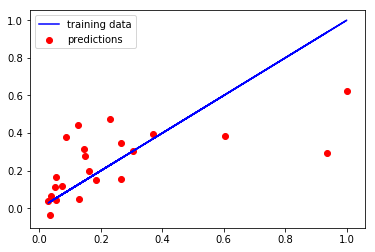

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(y_train,y_train, color='blue', label='training data')
plt.scatter(y_train,y_hat_train, color='red', label='predictions')
plt.legend()
plt.show()

## Plot the test predictions against the actual data (y_hat_test vs. y_test)

Do the same thing for the test data.

In [10]:
# your code here
y_hat_test=linreg.predict(x_test)

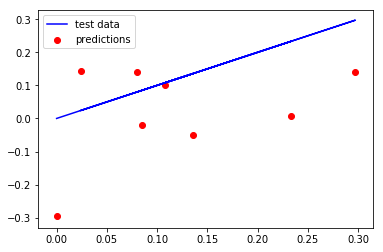

In [11]:
plt.plot(y_test,y_test, color='blue', label='test data')
plt.scatter(y_test,y_hat_test, color='red', label='predictions')
plt.legend()
plt.show()

## Calculate the bias
Write a formula to calculate the bias of a models predictions given the actual data: $Bias(\hat{f}(x)) = E[\hat{f}(x)-f(x)]$   
(The expected value can simply be taken as the mean or average value.)  


In [16]:
import numpy as np
def bias(y, y_hat):
    return np.mean(y_hat-y)

## Calculate the variance
Write a formula to calculate the variance of a model's predictions: $Var(\hat{f}(x)) = E[\hat{f}(x)^2] - \big(E[\hat{f}(x)]\big)^2$

In [17]:
def variance(y_hat):
    return np.mean(y_hat**2)-(np.mean(y_hat))**2

## Use your functions to calculate the bias and variance of your model. Do this seperately for the train and test sets.

In [21]:
# code for train set bias and variance
print(f'bias training data: {bias(y_train,y_hat_train)}')
print(f'bias testing data: {bias(y_test,y_hat_test)}')

bias training data: 3.847932073984918e-17
bias testing data: -0.09918523871485568


In [22]:
# code for test set bias and variance
print(f'variance training data : {variance(y_hat_train)}')
print(f'variance testing data : {variance(y_hat_test)}')

variance training data : 0.027494596346770345
variance testing data : 0.019696405684461456


## Describe in words what these numbers can tell you.

Your description here (this cell is formatted using markdown)

## Overfit a new model by creating additional features by raising current features to various powers.

Use `PolynomialFeatures` with degree 3. 

**Important note:** By including this, you don't only take polynomials of single variables, but you also combine variables, eg:

$ \text{Budget} * \text{MetaScore} ^ 2 $

What you're essentially doing is taking interactions and creating polynomials at the same time! Have a look at how many columns we get using `np.shape`. Quite a few!


In [26]:
from sklearn.preprocessing import PolynomialFeatures
# your code here
poly=PolynomialFeatures(3)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)

In [27]:
np.shape(x_train_poly)

(22, 35)

## Plot your overfitted model's training predictions against the actual data

In [32]:
linreg_poly=LinearRegression()
linreg_poly.fit(x_train_poly,y_train)
y_hat_train_poly=linreg_poly.predict(x_train_poly)

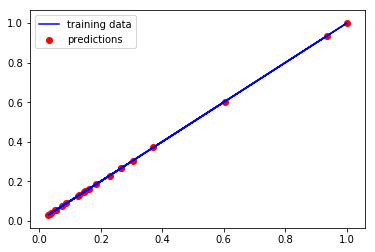

In [33]:
plt.plot(y_train,y_train, color='blue', label='training data')
plt.scatter(y_train,y_hat_train_poly, color='red', label='predictions')
plt.legend()
plt.show()

Wow, we almost get a perfect fit!

## Calculate the bias and variance for the train set

In [34]:
# your code here
print(f'polynomial training bias: {bias(y_train,y_hat_train_poly)}')
print(f'polynomial training variance: {variance(y_hat_train_poly)}')

polynomial training bias: -5.355249072474583e-15
polynomial training variance: 0.07041887982067883


## Plot your overfitted model's test predictions against the actual data.

In [35]:
# your code here
y_hat_test_poly=linreg_poly.predict(x_test_poly)

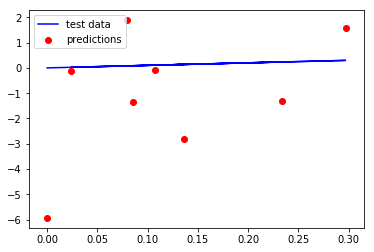

In [36]:
plt.plot(y_test,y_test, color='blue', label='test data')
plt.scatter(y_test,y_hat_test_poly, color='red', label='predictions')
plt.legend()
plt.show()

##  Calculate the bias and variance for the train set.

In [37]:
# your code here
print(f'polynomial testing bias: {bias(y_test,y_hat_test_poly)}')
print(f'polynomial testing variance: {variance(y_hat_test_poly)}')

polynomial testing bias: -1.1418224566085704
polynomial testing variance: 5.548246819953505


## Describe what you notice about the bias and variance statistics for your overfit model

The bias and variance for the test set both increased drastically in the overfit model.

## Level Up - Optional

In this lab we went from 4 predictors to 35 by adding polynomials and interactions, using `PolynomialFeatures`. That being said, where 35 leads to overfitting, there are probably ways to improve by just adding a few polynomials. Feel free to experiment and see how bias and variance improve!

## Summary

This lab gave you insight in how bias and variance change for a training and test set by using a pretty "simple" model, and a very complex model. 